In [1]:
!pip3 install seaborn
!pip3 install jedi
!pip3 install scikit-learn
!pip3 install numpy
!pip3 install pandas
!pip3 install seaborn
!pip3 install matplotlib

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [3]:
data = pd.read_csv('input/diabetes.csv')

In [4]:
y = data['Outcome']
del data['Outcome']
X = data

<Axes: >

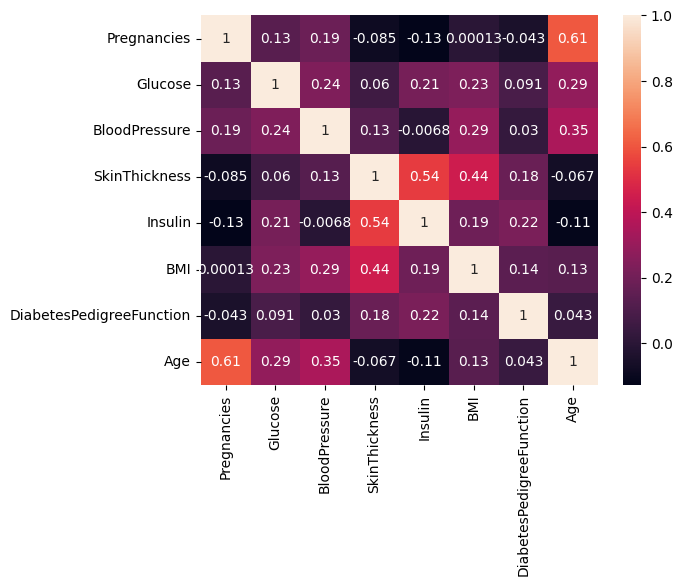

In [5]:
sns.heatmap(data.corr(method="spearman"), annot=True)

In [17]:
del data['SkinThickness'], data['BloodPressure']

KeyError: 'SkinThickness'

In [18]:
norm = MinMaxScaler().fit(X)
X = norm.transform(X)

In [19]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [20]:
class MyLogisticRegression:
    def __init__(self):
        self.w, self.b, self.i = 0, 0, 0

    def fit(self, x_train, y_train, learning_rate=0.01, lambda_=0.01):
        n = x_train.shape[1]
        
        self.w = np.random.uniform(-1, 1, n)
        self.b = np.random.uniform(-1, 1, 1)[0]

        x = x_train#.to_numpy()
        y = y_train.to_numpy()

        last_w = 0
        self.i = 0

        while True:
            self.i += 1
            for i in range(len(x)):
                a = sigmoid(self.w.dot(x[i]) + self.b)
                dw = learning_rate * (a - y[i]) * x[i]
                db = learning_rate * (a - y[i])

                self.w = self.w - dw# + 2 * lambda_ * self.w
                self.b = self.b - db

            if np.linalg.norm(last_w - self.w) < 1e-3:
                break
            else: 
                last_w = self.w
            
                    

    def predict(self, x_test):
        x = x_test#.to_numpy()
        list_ = []
        for i in range(len(x)):
            list_.append(0 if (self.w.dot(x[i]) + self.b) < 0.5 else 1)
        return np.array(list_)

In [21]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [22]:
lg = MyLogisticRegression()
lg.fit(x_train, y_train, 0.001)
result = lg.predict(x_test)

In [23]:
print(accuracy_score(y_test, result))

0.7835497835497836


In [24]:
print(lg.i)

2495


In [25]:
print(lg.w, 'coef')
print(lg.b, 'bias')

[ 1.59807627  6.44925104 -1.10429567  4.70552135  1.29963192  0.89589734] coef
-7.591754137728001 bias


In [26]:
from sklearn.model_selection import train_test_split

In [27]:
np.random.uniform(-1, 1, 5)

array([-0.57058403,  0.54215495, -0.70844401, -0.44200104,  0.73140821])